<a href="https://colab.research.google.com/github/safdarjung/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

'''

'\n\n'

In [ ]:
!unzip -j advertizing.zip

Archive:  advertizing.zip
  inflating: Advertising.csv         


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.duplicated().sum()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# df.drop('Unnamed: 0',axis=1,inplace=True)

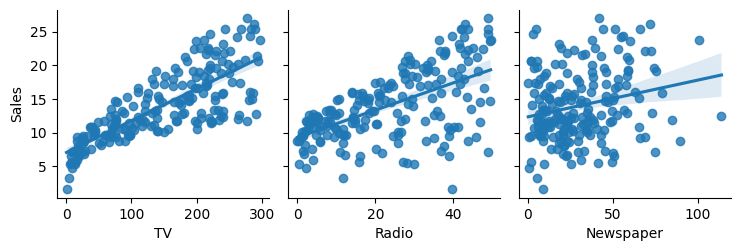

In [ ]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
plt.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

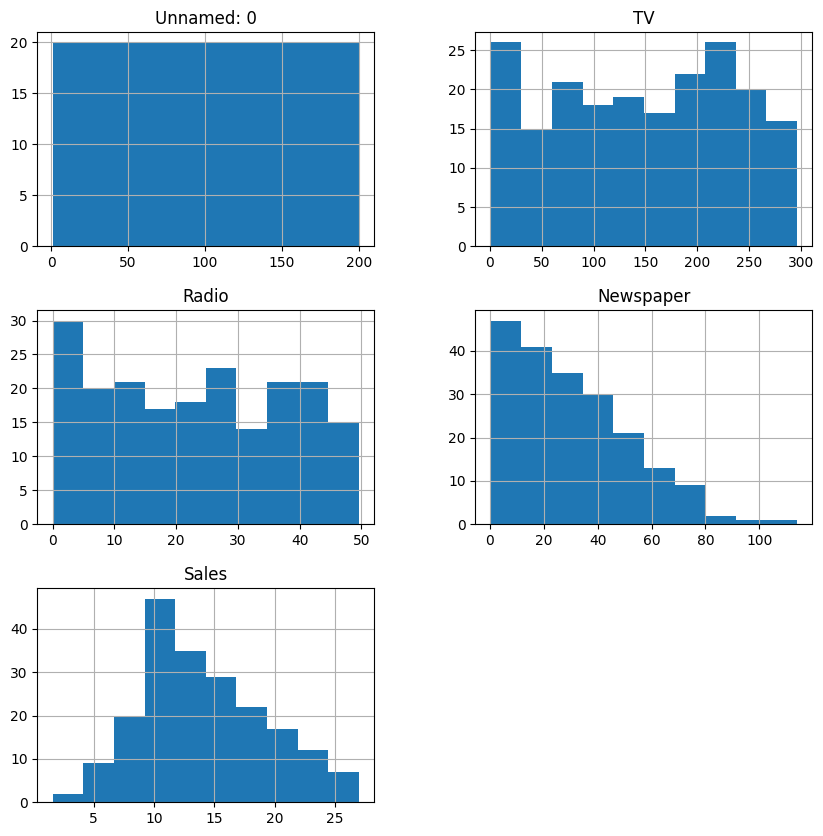

In [ ]:
df.hist(bins=10,figsize=(10,10))

<Axes: >

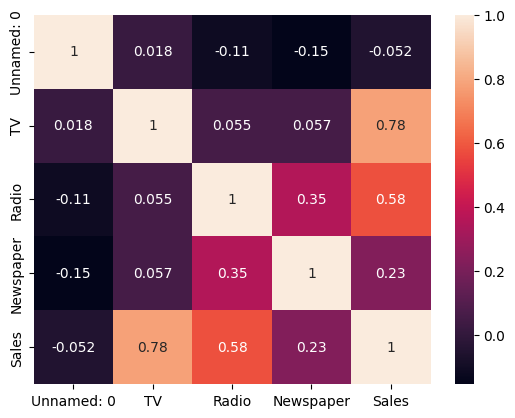

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

Sales are affected mostly by TV > Radio > Newspaper

In [ ]:
# df['Total_adv']=df['TV']+df['Newspaper']+df['Radio']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
x = df.drop('Sales',axis=1)
y = df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)


In [ ]:
import statsmodels.formula.api as sm


In [ ]:
linear_model= sm.ols(formula='Sales ~ TV + Radio + Newspaper',data=df).fit()

In [ ]:
# the calculated coeff

print(linear_model.params, '\n')

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [ ]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        04:34:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models=[('LinearRegression',LinearRegression())]

for name,model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  rmse=mean_squared_error(y_test,y_pred)
  print(f"{name}: RMSE = {rmse:.2f}")
  print(f" The train accuracy : {r2_score(y_train,model.predict(x_train))} The test accuracy : {r2_score(y_test , y_pred)}")


LinearRegression: RMSE = 2.90
 The train accuracy : 0.9036235036433335 The test accuracy : 0.8503383755246359


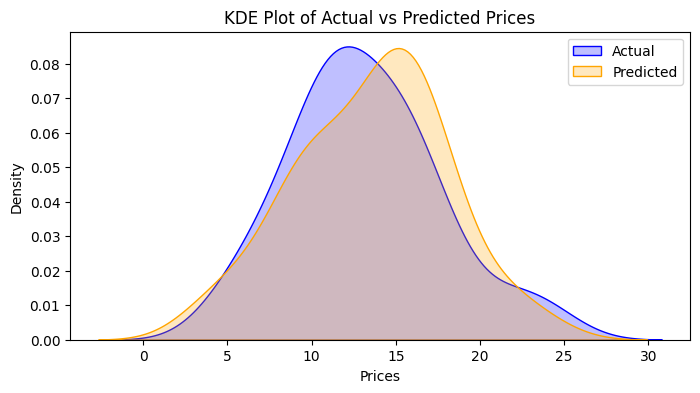

In [ ]:
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Make predictions on new data
new_data_1 = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales_1 = linear_model.predict(new_data_1)
print("Predicted Sales (Data 1):", predicted_sales_1)

Predicted Sales (Data 1): 0    16.915917
dtype: float64
